# Ensemble Techniques : (Term Deposit Sale)

## Problem statement :

Using the collected from exisitng customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Deliverable 1 : (Exploratory data quality report reflecting the following)


1. Univaritae analysis : data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median)), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers.

2. Multivariate analysis:
 a. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your  findings in terms of either relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

3. Strategies to address the different data challenges such as data pollution, outliers and missing values. 

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
#Getting the Data from the .csv file
db=pd.read_csv('bank-full.csv')

In [5]:
#Checking first 6 rows
db.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [6]:
#Checking last 6 rows
db.tail(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
# understand shape and size of dataset
print(db.shape)
print (db.size)

(45211, 17)
768587


In [8]:
#get more information about dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Details of the Dataset , only the numeric columns will have the details
db.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# many columns are of type object i.e. strings. These need to be converted to ordinal/Numeric type
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for col in db.columns: # Loop through all columns in the dataframe
    if db[col].dtype == 'object': # Only apply for columns with categorical strings
        db[col] = pd.Categorical(db[col]).codes # Replace strings with an integer

In [11]:
# Converted all the columns into Numeric Datatypes
# ALl the columns does not contain any null values
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
Target       45211 non-null int8
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [12]:
# Checking the distribution between Target ('Yes') and Target ('No')
db.groupby(["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [13]:
#Checking the null values, and if there is null value present then drop those columns
val=db.isnull().values.any()

if val==True:
    print("Missing/NaN values present", db.isnull().values.sum())
    db=db.dropna()
else:
    print("No missing/NaN values")

No missing/NaN values


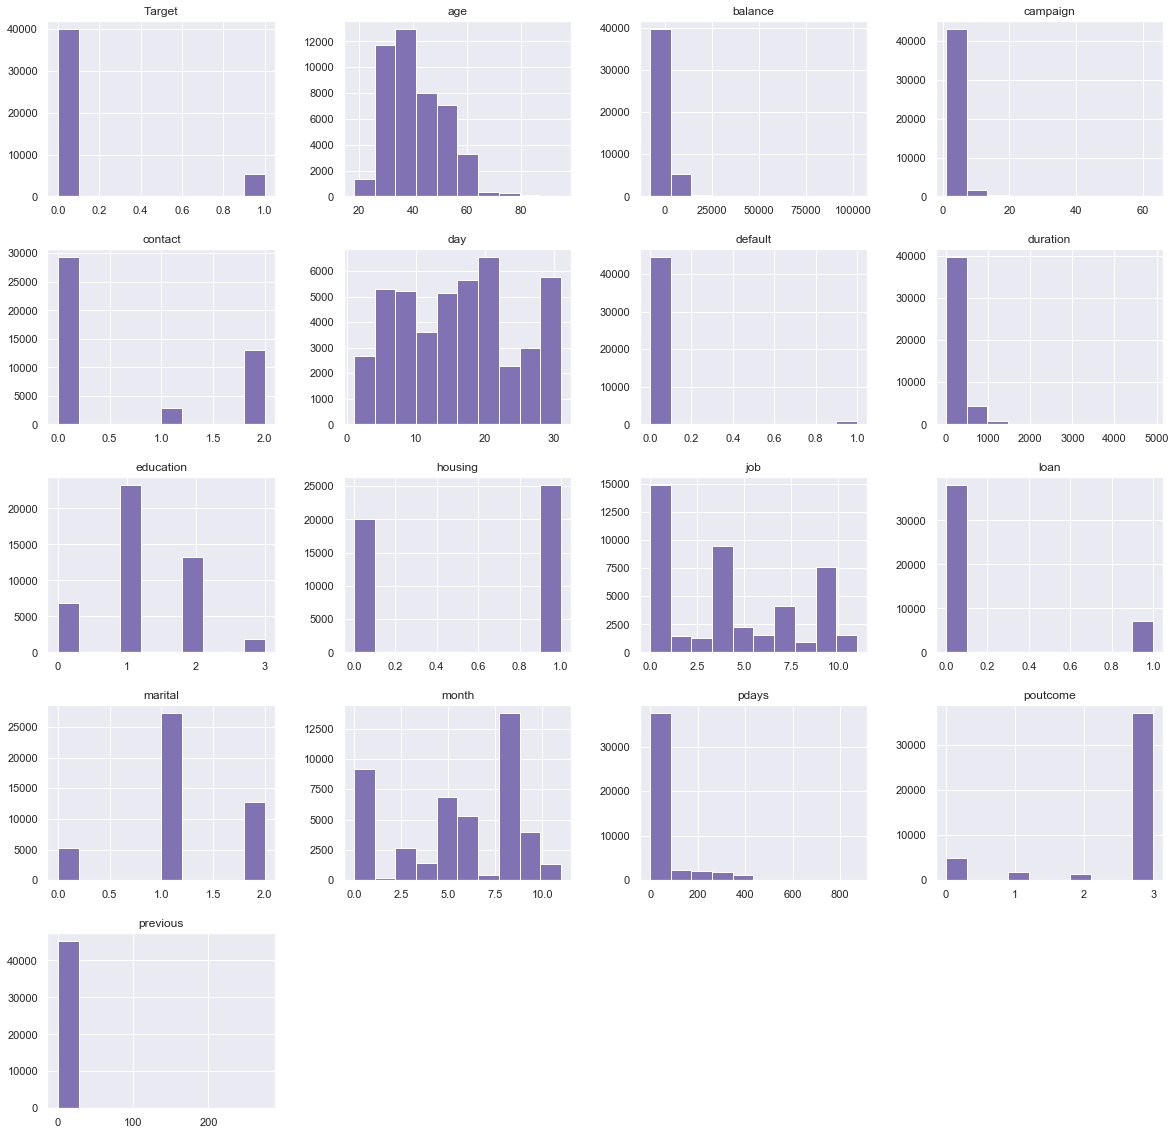

In [15]:
# plot histogram

db.hist(figsize=(20,20),color="m",grid=True)
plt.show()

Input Variables : 
1. age (numeric)
2. job : type of job (categorical : "admin","unknown","uneployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. maritial : maritial status (categorical: "married","divorced","single")
4. education : (categorical: "unknown","secondary","primary","tertiary")
5. default : has credit in default ? (binary: "yes","no")
6. balance: average yearly balance in euros (numeric)
7. housing : has housing loan ? (binary: "yes","no")
8. loan : has personal loan ? (binary: "yes","no")
9. contact : contact communication type (categorical: "unknown","telephone","cellular")
10. day : last contact day of the month (numeric)
11. month : last contact month of the year (categorical: "jan","feb" to "dec")
12. duration : last contact duration in seconds (numeric)
13. campaign : number of contacts performed before this campaign and for this client (numeric)
14. pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric 1 menas client was not previously contacted)
15. previous : number of contacts performed before this campaign and for this client (numeric)
16. poutcome : outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable: (desired target)
17. y : has the client subscribed a term diposit ? (binary: "yes","no")

Since we have converted the categorical variable to numerical ones,the values are converted to 0, 1 and so on depending on their alphabetic order.

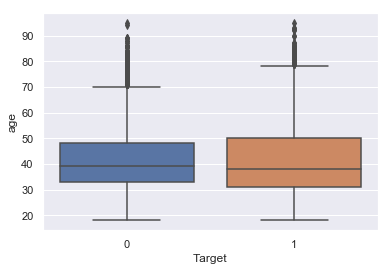

In [23]:
# boxplot for the numeric columns
sns.boxplot(x="Target", y="age", data=db)

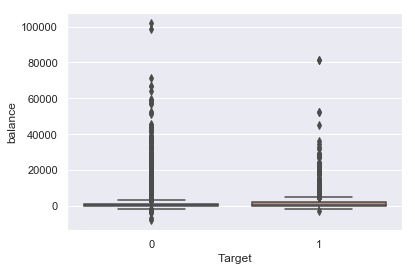

In [27]:
# boxplot
sns.boxplot(x="Target", y="balance", data=db)

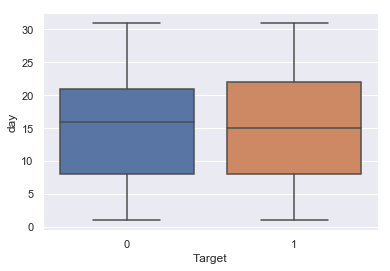

In [28]:
# boxplot
sns.boxplot(x="Target", y="day", data=db)

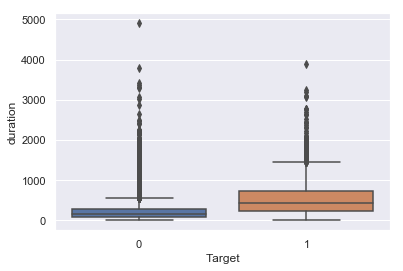

In [29]:
# boxplot
sns.boxplot(x="Target", y="duration", data=db)

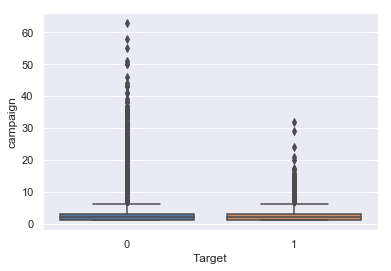

In [30]:
# boxplot
sns.boxplot(x="Target", y="campaign", data=db)

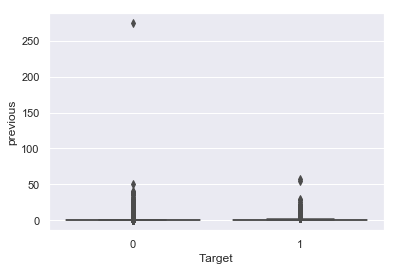

In [31]:
# boxplot
sns.boxplot(x="Target", y="previous", data=db)

It is evident from the above boxplots that : (as follows)
    1. age vs Target has large outliers for both the outcomes ,
    2. balance vs Target has high peak for target = 0 ,
    3. day vs Target are more or less same,
    4. duration vs Target has an obvious greater mean for target = 1,
    5. campaign vs Target has not much to look for except target= 0 has comparatively large outliers,
    6. previous vs Target has interestingly some high outliers for target = 0.

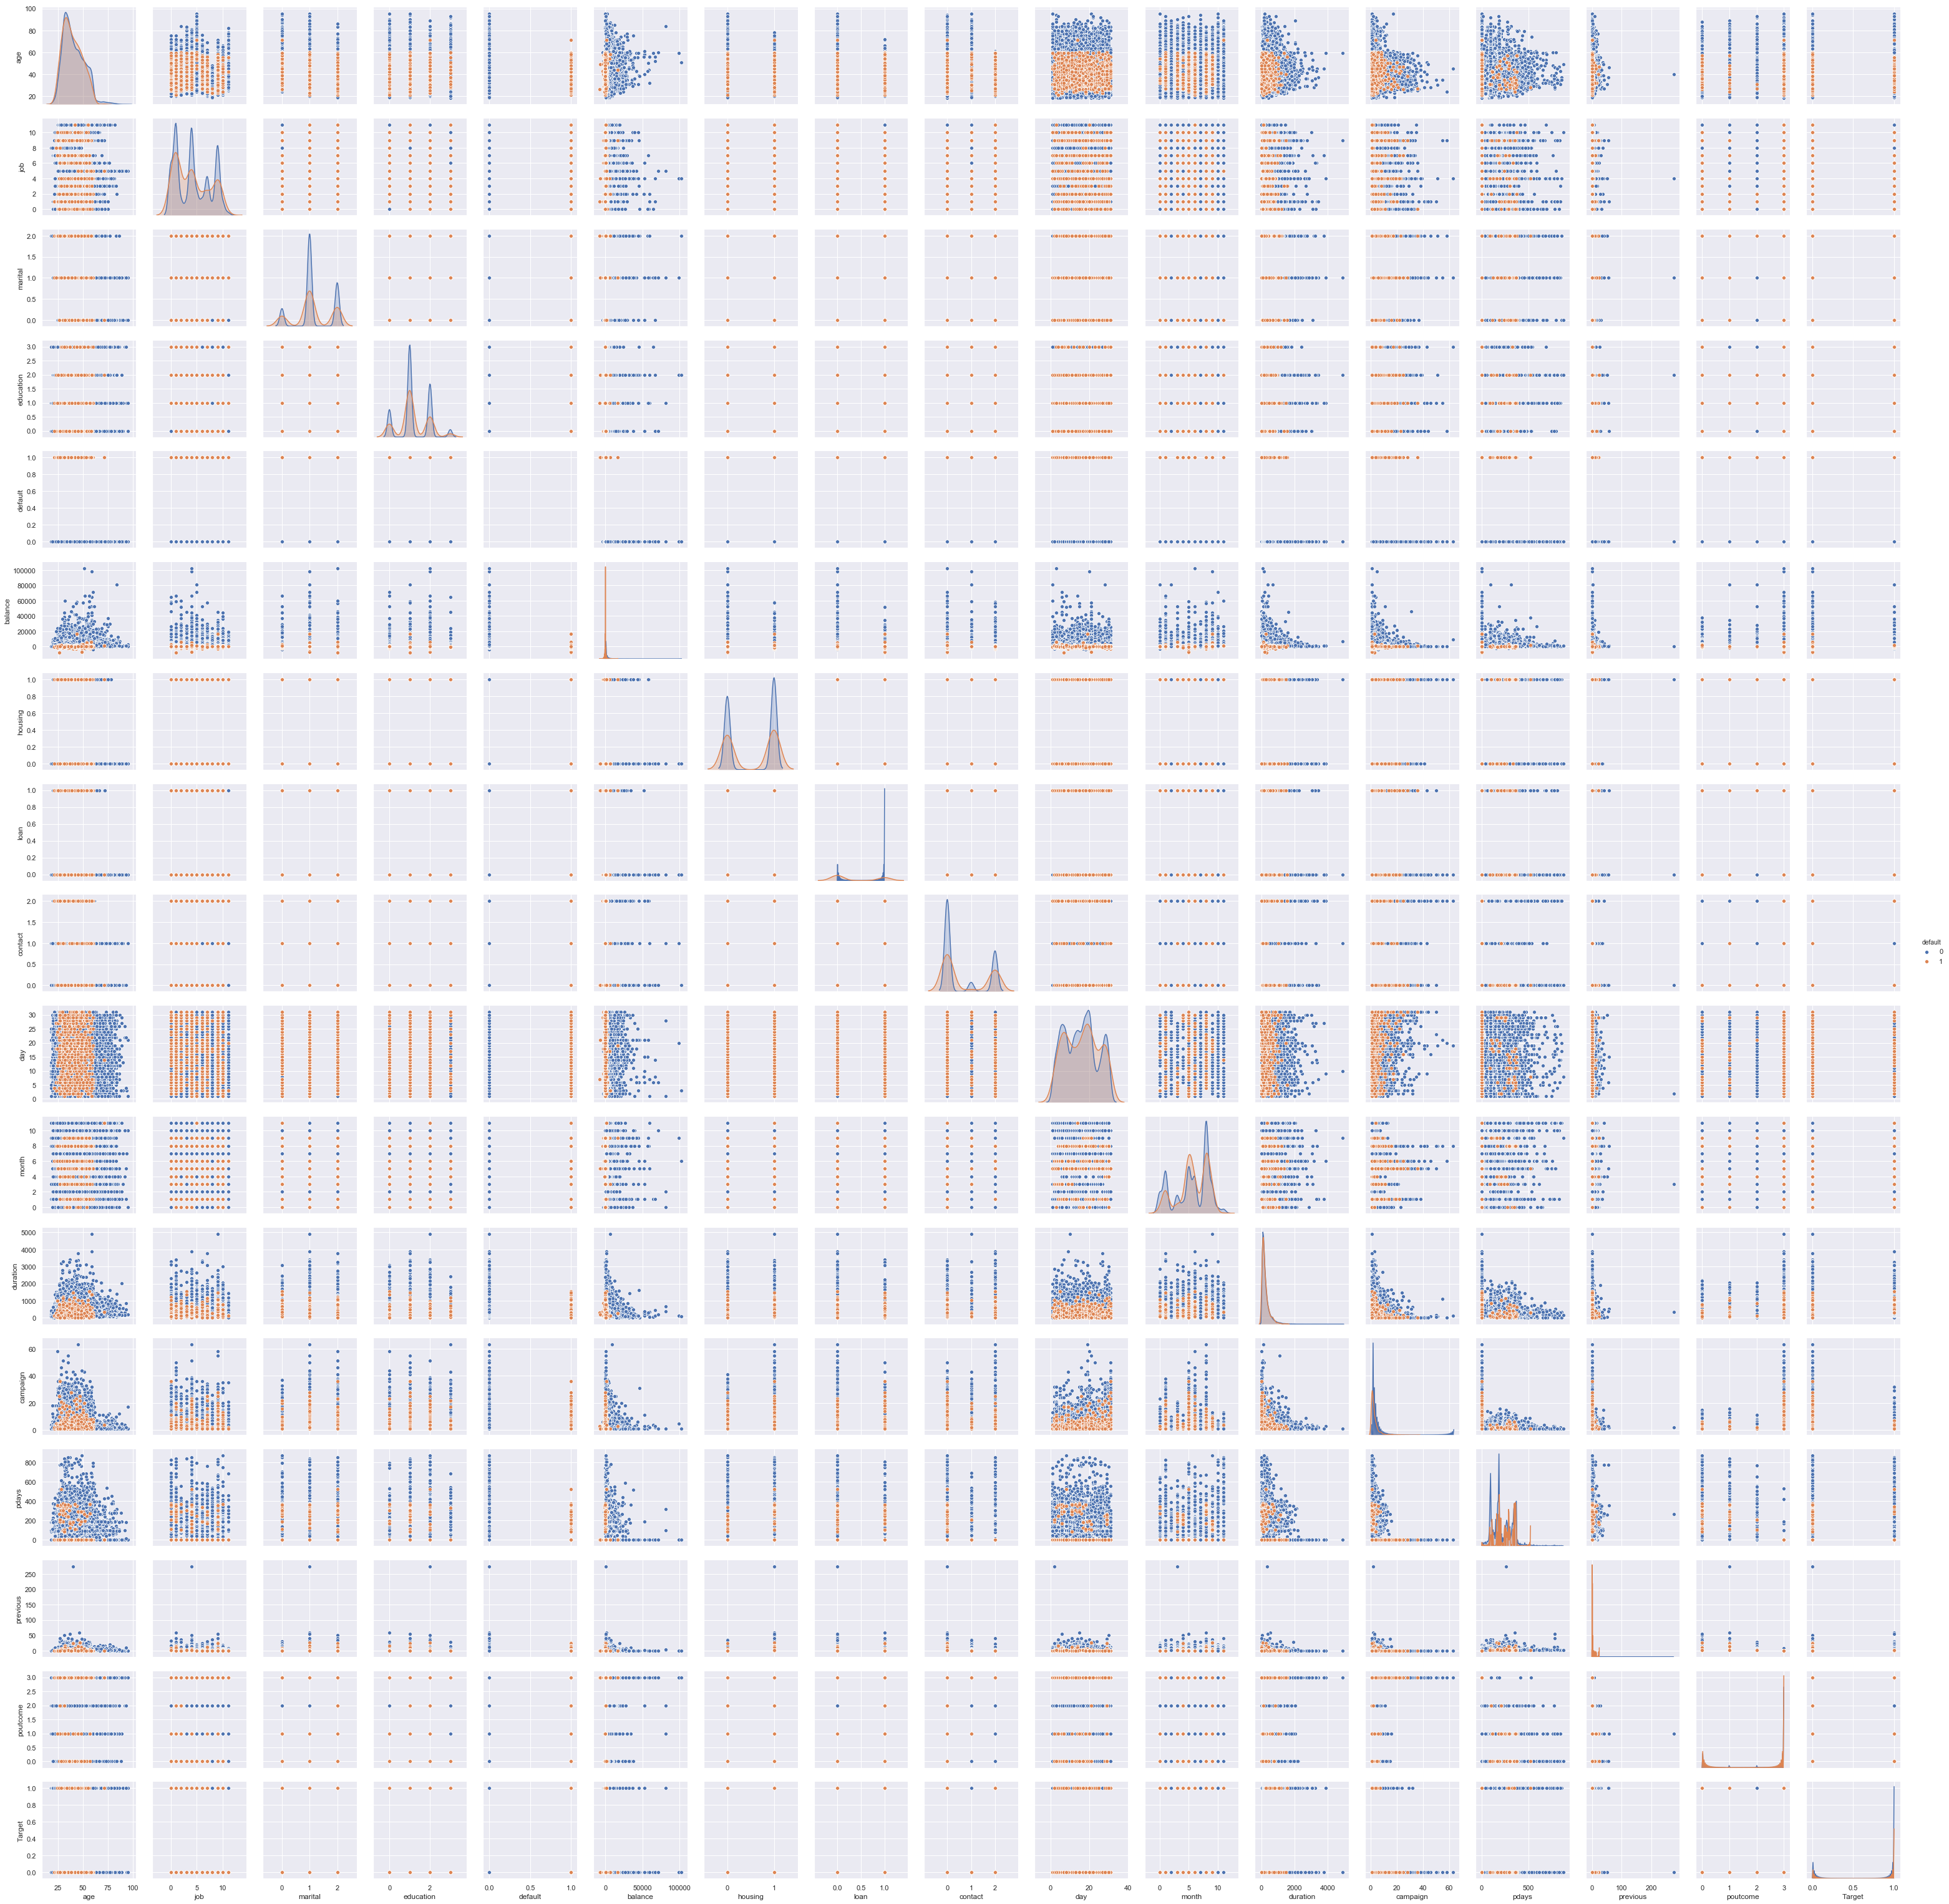

In [17]:
# Pairplot using sns
sns.pairplot(db, hue = "default")

In [18]:
# Since the dataset contains a large datas, and have around 17 coulmns to compare, hence the pairplot takes a longer time
# to give out the result. 
#Checking the corelation coefficient
cor=db.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


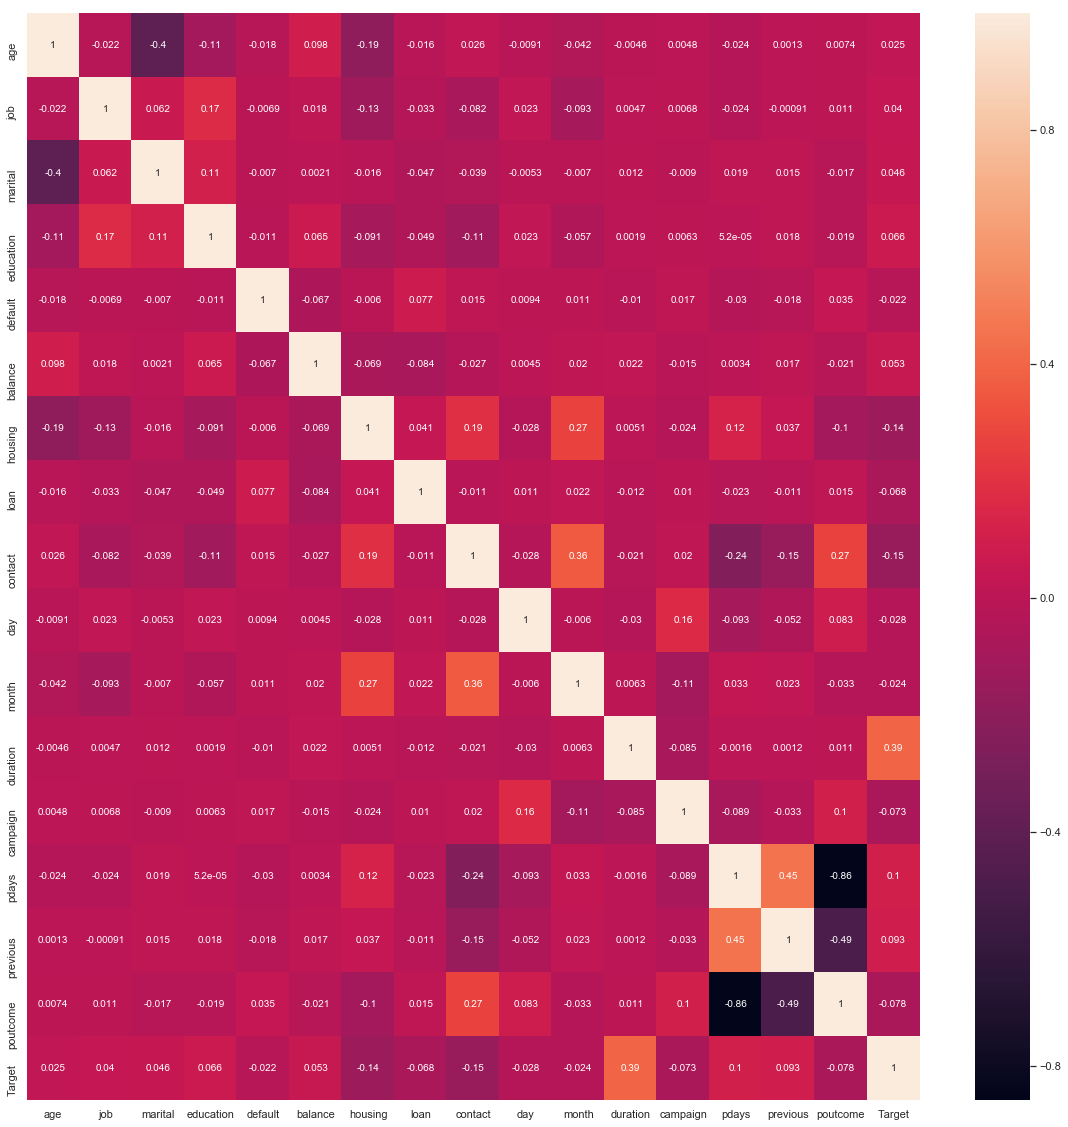

In [20]:
#Plotting the Heatmap with the variables
plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True)

From the above heatmap, we can takeaway the following features : (the darker the box, less the corelation between them)

1. Poutcome and pdays has the least (negative) corelation of -0.86
2. Highest (positive) corelation is between previous and pdays of 0.45

other columns are more or less independent with each other.

### Deliverable 2 (Prepare the data for analytics)



1. Load the data into a data-frame. The data-frame should have data and column description,
2. Ensure the attribute types are correct. If not, take appropriate actions
3. Transform the data i.e scale/normalize if required
4. Create the training set and test set in ration of 70:30

In [33]:
# capture the target column ("Target") into separate vectors for training set and test set

X = db.drop("Target" , axis=1)
y = db.pop("Target")

In [34]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [35]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index. 
                                 
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [37]:
# Fitting the training dataset into the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
y_predict = dt_model.predict(X_test)

In [40]:
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test , test_labels))

1.0
0.8765850781480389


### Deliverable 3 (Create the ensemble model)



1. Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model
2. First create a model using standard classification algorithm. Note the model performance
3. Use appropriate algorithms and explain why that algorithm in the comment lines
4. Evaluate the model. Use confusion matrix to evaluate class level metrics i.e. Precision and recall. Also reflect the overall score of the model,
5.Advantages and disadvantages of the algorithm,
6. Build the ensemble models and compare the results with the base model. Note : Random Forest can be used only for Decision Tree.

In [42]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(test_labels, y_predict))

[[11144   869]
 [  805   746]]


In [43]:
# Look at the class level metric for the 'client not subscribed a term diposit' class. It is poor. 

### Regularising the Decision Tree

In [45]:
# Regularising by defining the max_depth as 7
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
y_predict = reg_dt_model.predict(X_test)

In [48]:
#Which gives a better result than the previous/overfitting model
reg_dt_model.score(X_test , test_labels)

0.9004718372161604

In [49]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[11642   371]
 [  979   572]]


### Deliverable 4 : (Tuning the model)



1. Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these paramaters to,
2. Regularization techniques used for the model,
3. Range estimate at 95% confidence for the model performance in production

### Ensemble Learning - Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, train_labels)

In [51]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.9060749041580655
[[11548   465]
 [  809   742]]


In [52]:
#Which gives a better result than the previous models.

### Ensemble Learning - AdaBoosting

In [55]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=20)
abcl = abcl.fit(X_train, train_labels)

In [56]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , test_labels))

print(metrics.confusion_matrix(test_labels, y_predict))

0.8758478324977883
[[11133   880]
 [  804   747]]


In [57]:
# A bit lesser result than the previous models.

### Ensemble Learning - GradientBoost

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, train_labels)

In [59]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.9004718372161604
[[11716   297]
 [ 1053   498]]


In [60]:
#Which gives a comparatively better result than the previous models.

### Ensemble RandomForest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, train_labels)

In [62]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

0.903347095252138
[[11610   403]
 [  908   643]]


In [63]:
#Which gives a comparatively better result than the previous models.